In [20]:
import pandas as pd
import numpy as np
import math
import os, sys
sys.path.append('../Bayesian-machine-learning/model.py')
from model import bayesian_nb_clf# Define the model:

In [21]:
# Question 1: Run the classifier.
label_train=pd.read_csv('label_train.csv',header=None)
X_train=pd.read_csv('x_train.csv',header=None)
label_test=pd.read_csv('label_test.csv',header=None).squeeze()
X_test=np.array(pd.read_csv('x_test.csv',header=None))
nb=bayesian_nb_clf([1,1],[1,1])
nb.train(X_train, label_train)
l=nb.predict(X_test)

In [110]:
# question 2: Get the confusion matrix
true_negative=[np.sum(np.logical_and(label_test==0, l==0)) , np.sum(np.logical_and(label_test==0, l==1))]
true_positive=[np.sum(np.logical_and(label_test==1, l==0)) , np.sum(np.logical_and(label_test==1, l==1))]
confusion_matrix=pd.DataFrame( dict(true_neg=true_negative, true_pos=true_positive), index=['pred_neg', 'pred_pos'])
confusion_matrix

,true_neg,true_pos
pred_neg,227,10
pred_pos,52,172


probability of the first miss classified:  0.105509571388952
probability of the second miss classified:  1.740323361401e-84
probability of the third miss classified:  8.226718015939013e-06


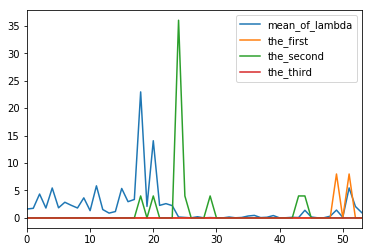

In [118]:
# question 3: plot 3 miss predicted datas.
miss_pred_index=np.arange(len(label_test))[ l != label_test.values][:3]
index1, index2, index3=miss_pred_index[0], miss_pred_index[1], miss_pred_index[2]
the_first=X_test[index1,:]
the_second=X_test[index2,:]
the_third=X_test[index3,:] 
log_probabilitys_of_first=nb.pred_log_probs_matrix[index1]
log_probabilitys_of_second=nb.pred_log_probs_matrix[index2]
log_probabilitys_of_third=nb.pred_log_probs_matrix[index3]
def sigmoid(k):
    return np.exp(k)/(1+np.exp(k))
prob_of_first=sigmoid(log_probabilitys_of_first[1]-log_probabilitys_of_first[0])
prob_of_second=sigmoid(log_probabilitys_of_second[1]-log_probabilitys_of_second[0])
prob_of_third=sigmoid(log_probabilitys_of_third[1]-log_probabilitys_of_third[0])
print( 'probability of the first miss classified: ', prob_of_first)
print('probability of the second miss classified: ', prob_of_second)
print( 'probability of the third miss classified: ', prob_of_third )
alphas=np.asarray( [nb.posterior_alphas['a_1_'+str(dim)] for dim in range(54)] )
beta=np.asarray(nb.posterior_betas['label_1'])
mean_of_lambda=alphas/beta
plot_data=pd.DataFrame(dict(the_first=the_first, the_second=the_second, the_third=the_third, mean_of_lambda=mean_of_lambda))
import matplotlib.pyplot as plt
plot_data.plot()
plt.show()

probability of the first miss classified:  0.5252802494709822
probability of the second miss classified:  0.5634932205474764
probability of the third miss classified:  0.5837342460258078


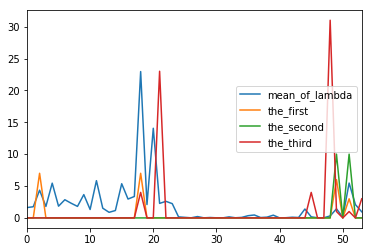

In [125]:
# question 4:
log_probabilitys_diff=[ np.abs(a[0]-a[1] ) for a in nb.pred_log_probs_matrix ]
miss_pred_index=[log_probabilitys_diff.index(i) for i in np.sort(log_probabilitys_diff)[:3] ]
index1, index2, index3=miss_pred_index[0], miss_pred_index[1], miss_pred_index[2]
the_first=X_test[index1,:]
the_second=X_test[index2,:]
the_third=X_test[index3,:] 
log_probabilitys_of_first=nb.pred_log_probs_matrix[index1]
log_probabilitys_of_second=nb.pred_log_probs_matrix[index2]
log_probabilitys_of_third=nb.pred_log_probs_matrix[index3]
def sigmoid(k):
    return np.exp(k)/(1+np.exp(k))
prob_of_first=sigmoid(log_probabilitys_of_first[1]-log_probabilitys_of_first[0])
prob_of_second=sigmoid(log_probabilitys_of_second[1]-log_probabilitys_of_second[0])
prob_of_third=sigmoid(log_probabilitys_of_third[1]-log_probabilitys_of_third[0])
print( 'probability of the first miss classified: ', prob_of_first)
print('probability of the second miss classified: ', prob_of_second)
print( 'probability of the third miss classified: ', prob_of_third )
alphas=np.asarray( [nb.posterior_alphas['a_1_'+str(dim)] for dim in range(54)] )
beta=np.asarray(nb.posterior_betas['label_1'])
mean_of_lambda=alphas/beta
plot_data=pd.DataFrame(dict(the_first=the_first, the_second=the_second, the_third=the_third, mean_of_lambda=mean_of_lambda))
import matplotlib.pyplot as plt
plot_data.plot()
plt.show()